# Installing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Omdena/Weather.csv')

In [3]:
df.head()

,cloudcover,conditions,Year,Quarter,Month,Day,DayType,description,dew,Division,...,Month.2,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,0.0,Clear,2013,Qtr 1,January,1,No rain,Clear conditions throughout the day.,50.9,Sylhet,...,January,1,60.8,73.8,47.4,6,1.6,208.4,NaN,6.0
1,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,13.6,Chittagong,...,January,2,18.3,24.0,11.9,7,4.2,323.1,NaN,18.4
2,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,53.0,Sylhet,...,January,2,62.9,75.6,50.8,7,1.9,203.8,NaN,7.2
3,0.0,Clear,2013,Qtr 1,January,3,No rain,Clear conditions throughout the day.,42.0,Naryanganj,...,January,3,60.9,78.9,48.5,7,2.5,10.2,NaN,9.8
4,0.0,Clear,2013,Qtr 1,January,4,No rain,Clear conditions throughout the day.,36.3,Naryanganj,...,January,4,60.1,81.8,46.3,7,2.5,12.7,NaN,8.5


In [4]:
df.columns

Index(['cloudcover', 'conditions', 'Year', 'Quarter', 'Month', 'Day',
       'DayType', 'description', 'dew', 'Division', 'feelslike',
       'feelslikemax', 'feelslikemin', 'Flood', 'humidity', 'moonphase',
       'precip', 'precipcover', 'precipprob', 'preciptype', 'sealevelpressure',
       'Season', 'severerisk', 'snow', 'snowdepth', 'solarenergy',
       'solarradiation', 'stations', 'Year.1', 'Quarter.1', 'Month.1', 'Day.1',
       'Year.2', 'Quarter.2', 'Month.2', 'Day.2', 'temp', 'tempmax', 'tempmin',
       'uvindex', 'visibility', 'winddir', 'windgust', 'windspeed'],
      dtype='object')

In [5]:
df.shape

(30000, 44)

In [6]:
df['Division'].unique()

array(['Sylhet', 'Chittagong', 'Naryanganj', 'Dhaka', 'Rajshahi',
       'Mymensingh', 'Barisal', 'Khulna'], dtype=object)

# Filtering for different divisions (in my case for eastern/southern division)

In [7]:
new_1 = df[df['Division']=='Barisal']

In [8]:
new_2 = df[df['Division']=='Chittagong']

In [9]:
new_3 = df[df['Division']=='Sylhet']

In [10]:
# Concatenating all the above filtered rows
new = pd.concat([new_1,new_2,new_3])

In [11]:
new.shape

(11610, 44)

# Checking the correlation of flood variable with independent numerical features or variables.

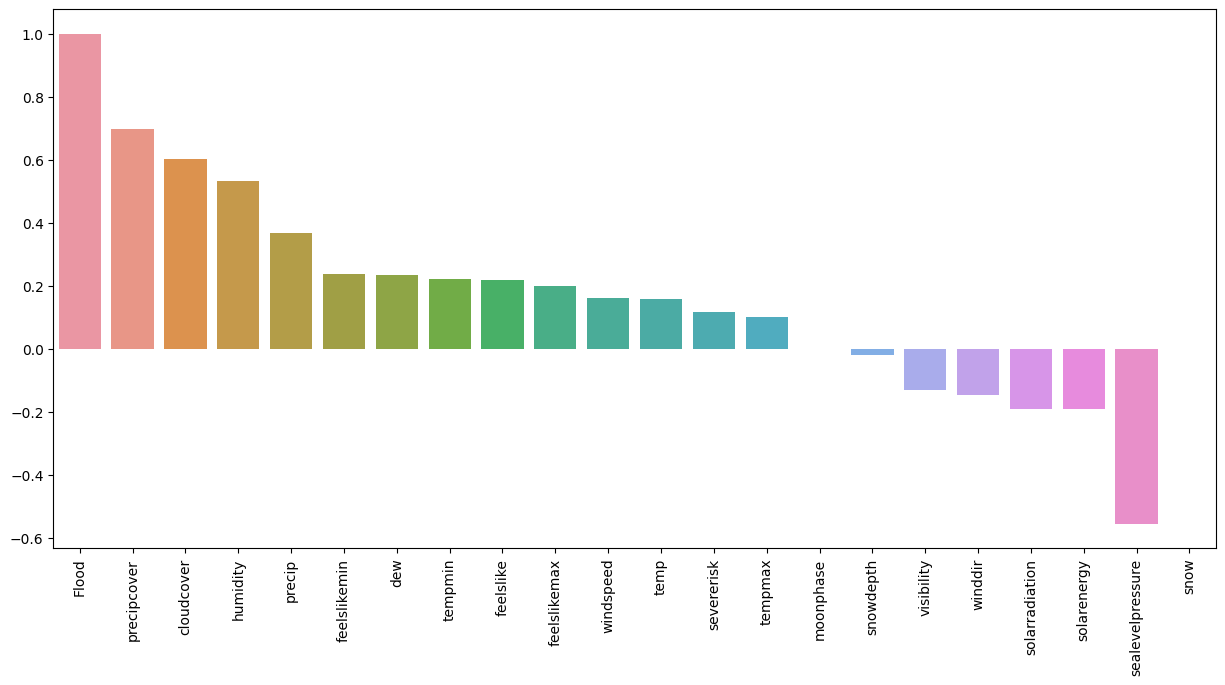

In [12]:
corr_numerical_features = list(new.select_dtypes(include=float).columns)
corr_numerical_features.append('Flood')
g = new[corr_numerical_features].corr()['Flood'].sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(x=g.index,y=g.values)
plt.show()

In [13]:
g

Flood               1.000000
precipcover         0.697621
cloudcover          0.601351
humidity            0.532649
precip              0.367501
feelslikemin        0.237572
dew                 0.234949
tempmin             0.219923
feelslike           0.217016
feelslikemax        0.199680
windspeed           0.162395
temp                0.157512
severerisk          0.115373
tempmax             0.101507
moonphase           0.000078
snowdepth          -0.018916
visibility         -0.131978
winddir            -0.148311
solarradiation     -0.191254
solarenergy        -0.191339
sealevelpressure   -0.555520
snow                     NaN
Name: Flood, dtype: float64

In [14]:
new['DayType'].unique()

array(['No rain', 'Rainy day'], dtype=object)

In [15]:
new['conditions'].unique()

array(['Clear', 'Rain', 'Partially cloudy', 'Rain, Partially cloudy',
       'Overcast', 'Rain, Overcast'], dtype=object)

In [16]:
new['Season'].unique()

array(['Winter', 'Summer', 'Spring', 'Monsoon', 'Late Autumn', 'Autumn'],
      dtype=object)

In [17]:
new['Division'].unique()

array(['Barisal', 'Chittagong', 'Sylhet'], dtype=object)

# Mapping categorical columns into numerical columns

In [18]:
d_rain = {'No rain':0, 'Rainy day':1}
d_season = {'Winter':0, 'Summer':1, 'Spring':2, 'Monsoon':3, 'Late Autumn':4, 'Autumn':5}
d_conditions = {'Clear':0, 'Rain':1, 'Partially cloudy':2, 'Rain, Partially cloudy':3,
       'Overcast':4, 'Rain, Overcast':5}
d_divisions = {'Barisal':0,'Chittagong':1,'Sylhet':2}

new['DayType'] = new['DayType'].map(d_rain)
new['conditions'] = new['conditions'].map(d_conditions)
new['Season'] = new['Season'].map(d_season)
new['Division'] = new['Division'].map(d_divisions)

# again checking for correlation to select essential features only

In [19]:
corr_numerical_features.extend(['DayType','conditions','Season','Division'])
new[corr_numerical_features].corr()['Flood'].sort_values(ascending=False)

Flood               1.000000
precipcover         0.697621
DayType             0.634981
cloudcover          0.601351
conditions          0.587062
humidity            0.532649
precip              0.367501
Season              0.266032
feelslikemin        0.237572
dew                 0.234949
tempmin             0.219923
feelslike           0.217016
feelslikemax        0.199680
windspeed           0.162395
temp                0.157512
severerisk          0.115373
tempmax             0.101507
Division            0.056706
moonphase           0.000078
snowdepth          -0.018916
visibility         -0.131978
winddir            -0.148311
solarradiation     -0.191254
solarenergy        -0.191339
sealevelpressure   -0.555520
snow                     NaN
Name: Flood, dtype: float64

# features selected from above correlation

In [20]:
features = ['Flood','precipcover', 'DayType', 'cloudcover',
       'conditions', 'humidity', 'precip', 'Season', 'feelslikemin','Division']

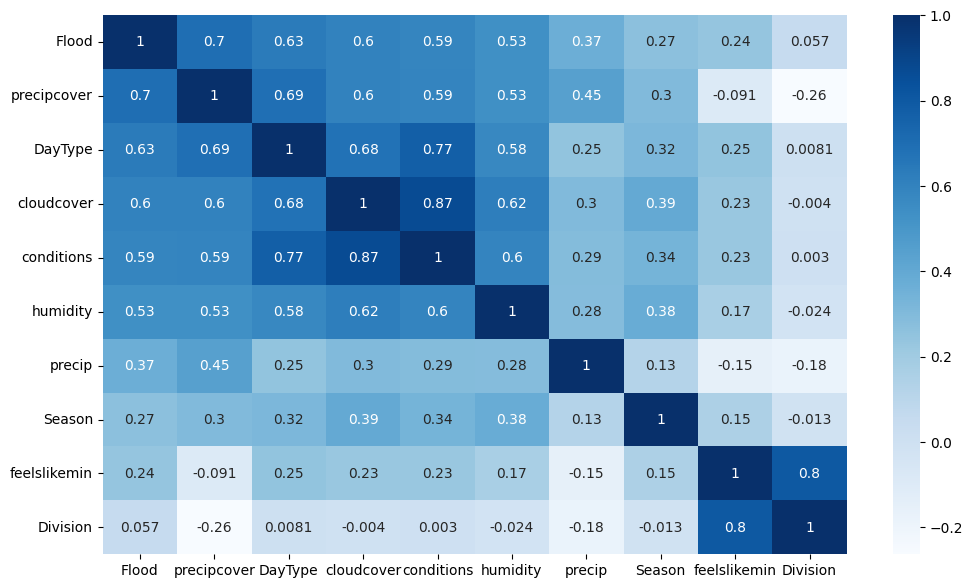

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(new[features].corr(),annot=True,cmap='Blues')
plt.show()

# Splitting independent variable X and dependent variable Y

In [22]:
X = new[['precipcover', 'DayType', 'cloudcover',
       'conditions', 'humidity', 'precip', 'Season', 'feelslikemin','Division']]
Y = new['Flood'].map({True:1,False:0})

In [23]:
# Data is little imbalanced
Y.value_counts()

0    7104
1    4506
Name: Flood, dtype: int64

# Splitting train and test data with 60-20-20

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.25,random_state=42)

# Creating a Sequential model for binary classification using neural network

In [25]:
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add another hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/25
218/218 [==============================] - 2s 6ms/step - loss: 0.2958 - accuracy: 0.8860 - val_loss: 0.2458 - val_accuracy: 0.8704
Epoch 2/25
218/218 [==============================] - 1s 6ms/step - loss: 0.1941 - accuracy: 0.9143 - val_loss: 0.1581 - val_accuracy: 0.9358
Epoch 3/25
218/218 [==============================] - 2s 9ms/step - loss: 0.1538 - accuracy: 0.9344 - val_loss: 0.1463 - val_accuracy: 0.9388
Epoch 4/25
218/218 [==============================] - 2s 10ms/step - loss: 0.1423 - accuracy: 0.9341 - val_loss: 0.1519 - val_accuracy: 0.9302
Epoch 5/25
218/218 [==============================] - 2s 8ms/step - loss: 0.1297 - accuracy: 0.9421 - val_loss: 0.1447 - val_accuracy: 0.9363
Epoch 6/25
218/218 [==============================] - 2s 10ms/step - loss: 0.1295 - accuracy: 0.9401 - val_loss: 0.1330 - val_accuracy: 0.9302
Epoch 7/25
218/218 [==============================] - 2s 7ms/step - loss: 0.1182 - accuracy: 0.9449 - val_loss: 0.1188 - val_accuracy: 0.9384
Epoc

# Classification report

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test,y_pred_binary))

73/73 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1415
           1       0.96      0.96      0.96       907

    accuracy                           0.97      2322
   macro avg       0.97      0.97      0.97      2322
weighted avg       0.97      0.97      0.97      2322



In [27]:
confusion_matrix(y_test,y_pred_binary)

array([[1378,   37],
       [  33,  874]])

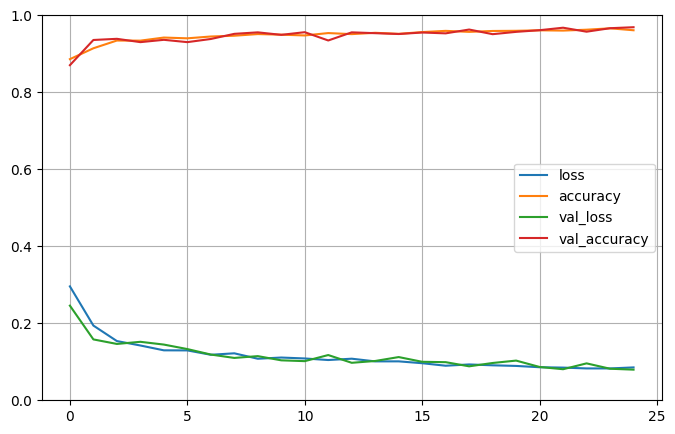

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()